In [1]:
import numpy as np
import yaml
import matplotlib.pyplot as plt
import healpy as hp
import heracles
import heracles.dices as dices
from heracles.io import read

## Nz Distributions

In [2]:
nzs = np.load('data/nzs.npz')

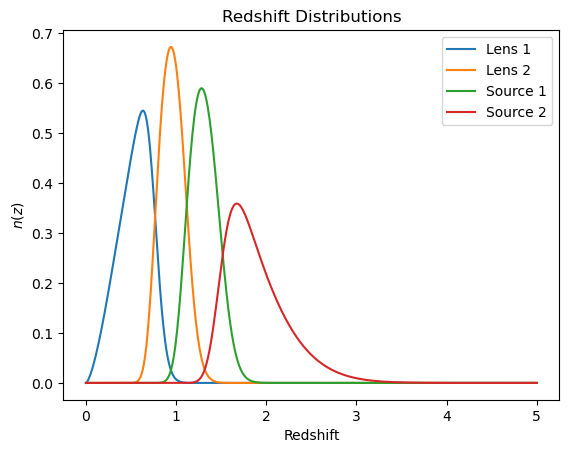

In [3]:
plt.plot(nzs['z'], nzs['nz_1'][0], label='Lens 1')
plt.plot(nzs['z'], nzs['nz_1'][1], label='Lens 2')
plt.plot(nzs['z'], nzs['nz_2'][0], label='Source 1')
plt.plot(nzs['z'], nzs['nz_2'][1], label='Source 2')
plt.legend()
plt.title('Redshift Distributions')
plt.xlabel('Redshift')
plt.ylabel(r'$n(z)$')
plt.show()

## Theory Cls

In [4]:
lmax = 256
ls = np.arange(lmax+1)
theory_cls = heracles.read(f"lognormal_sims/lognormal_sim_1/theory_cls.fits")

fl = -np.sqrt((ls+2)*(ls+1)*ls*(ls-1))
fl /= np.clip(ls*(ls+1), 1, None)

print(theory_cls["W1xW1"].shape)
_theory_cls = {}
_theory_cls[("POS", "POS", 1, 1)] = heracles.Result(theory_cls["W1xW1"].array, ell=ls)
_theory_cls[("POS", "POS", 1, 2)] = heracles.Result(theory_cls["W1xW2"].array, ell=ls)
_theory_cls[("POS", "POS", 2, 2)] = heracles.Result(theory_cls["W2xW2"].array, ell=ls)

c = np.zeros((2, 2, lmax+1))
c[0, 0, :] = theory_cls["W3xW3"].array * fl**2
_theory_cls[("SHE", "SHE", 1, 1)] = heracles.Result(c)

c = np.zeros((2, 2, lmax+1))
c[0, 0, :] = theory_cls["W3xW4"].array * fl**2
_theory_cls[("SHE", "SHE", 1, 2)] = heracles.Result(c)

c = np.zeros((2, 2, lmax+1))
c[0, 0, :] = theory_cls["W4xW4"].array * fl**2
_theory_cls[("SHE", "SHE", 2, 2)] = heracles.Result(c)

c = np.zeros((2, lmax+1))
c[0, :] = theory_cls["W1xW3"].array * fl
_theory_cls[("POS", "SHE", 1, 1)] = heracles.Result(c)

c = np.zeros((2, lmax+1))
c[0, :] = theory_cls["W2xW3"].array * fl
_theory_cls[("POS", "SHE", 1, 2)] = heracles.Result(c)

c = np.zeros((2, lmax+1))
c[0, :] = theory_cls["W3xW2"].array * fl
_theory_cls[("POS", "SHE", 2, 1)] = heracles.Result(c)

c = np.zeros((2, lmax+1))
c[0, :] = theory_cls["W2xW4"].array * fl
_theory_cls[("POS", "SHE", 2, 2)] = heracles.Result(c)


(257,)


In [17]:
def plot_clustering(theory):
    bins = [key[3] for key in theory.keys()]
    nbins = 3 # max(bins)+1
    fig, ax = plt.subplots(
        nbins - 1, nbins - 1, figsize=(6, 6), sharex=True, sharey=True
    )
    for i in range(1, nbins):
        for j in range(1, i):
            ax[j - 1, i - 1].axis("off")
        for j in range(i, nbins):
            ax[j - 1, i - 1].plot(
                ls[1:],
                theory["POS", "POS", i, j][1:],
                c="C0",
                lw=1.0,
                zorder=4.0,
            )
            ax[j - 1, i - 1].axhline(0.0, c="k", lw=0.8, zorder=-1)
            ax[j - 1, i - 1].tick_params(axis="both", which="both", direction="in")

    ax[0, 0].set_xscale("log")
    ax[0, 0].set_xlim(1, lmax+1)
    ax[0, 0].xaxis.get_major_locator().set_params(numticks=99)
    ax[0, 0].xaxis.get_minor_locator().set_params(
        numticks=99, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_yscale(
        "symlog", linthresh=1e-7, linscale=0.45, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_ylim(-2e-4, 2e-4)
    ax[0, 0].legend(
        loc="upper right",
        fontsize="small",
        frameon=False,
        handlelength=1.5,
        handletextpad=0.5,
        borderpad=0.2,
        labelspacing=0.2,
        borderaxespad=0.2,
        ncol=1,
        columnspacing=0.5,
        bbox_to_anchor=(1.5, 1.0),
    )

    fig.subplots_adjust(
        left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0
    )

    fig.supxlabel("angular mode $\\ell$", y=-0.05, va="top")
    fig.supylabel("galaxy clustering $C_\\ell$", x=-0.1, ha="right")

    plt.show()

def plot_shear(theory):
    bins = [key[3] for key in theory.keys()]
    nbins = 3 #max(bins)+1
    fig, ax = plt.subplots(
        nbins - 1, nbins - 1, figsize=(6, 6), sharex=True, sharey=True
    )
    for i in range(1, nbins):
        for j in range(1, i):
            ax[j - 1, i - 1].axis("off")
        for j in range(i, nbins):
            ax[j - 1, i - 1].plot(
                ls[2:],
                theory["SHE", "SHE", i, j][0, 0, 2:],
                c="C0",
                lw=1.0,
                zorder=4.0,
                label="E",
            )
            ax[j - 1, i - 1].plot(
                ls[2:],
                theory["SHE", "SHE", i, j][1, 1, 2:],
                c="C1",
                lw=1.0,
                zorder=4.0,
                label="B",
            )
            
            ax[j - 1, i - 1].axhline(0.0, c="k", lw=0.8, zorder=-1)
            ax[j - 1, i - 1].tick_params(axis="both", which="both", direction="in")

    ax[0, 0].set_xscale("log")
    ax[0, 0].set_xlim(2, lmax+1)
    ax[0, 0].xaxis.get_major_locator().set_params(numticks=99)
    ax[0, 0].xaxis.get_minor_locator().set_params(
        numticks=99, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_yscale(
        "symlog", linthresh=1e-10, linscale=0.45, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_ylim(-3e-7, 5e-7)
    ax[0, 0].legend(
        loc="upper right",
        fontsize="small",
        frameon=False,
        handlelength=1.5,
        handletextpad=0.5,
        borderpad=0.2,
        labelspacing=0.2,
        borderaxespad=0.2,
        ncol=1,
        columnspacing=0.5,
        bbox_to_anchor=(1.5, 1.0),
    )

    fig.subplots_adjust(
        left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0
    )

    fig.supxlabel("angular mode $\\ell$", y=-0.05, va="top")
    fig.supylabel("cosmic shear E-mode  $C_\\ell$", x=-0.1, ha="right")

    plt.show()

def plot_clusteringxshear(theory):
    bins = [key[3] for key in theory.keys()]
    nbins = max(bins)+1
    fig, ax = plt.subplots(
        nbins - 1, nbins - 1, figsize=(6, 6), sharex=True, sharey=True
    )
    for i in range(1, nbins):
        for j in range(1, nbins):
            ax[j - 1, i - 1].plot(
                ls[2:],
                theory["POS", "SHE", i, j][0, 2:],
                c="C0",
                lw=1.0,
                zorder=4.0,
                label="E",
            )
            ax[j - 1, i - 1].plot(
                ls[2:],
                theory["POS", "SHE", i, j][1, 2:],
                c="C1",
                lw=1.0,
                zorder=2.0,
                label="B",
            )
            ax[j - 1, i - 1].axhline(0.0, c="k", lw=0.8, zorder=-1)
            ax[j - 1, i - 1].tick_params(axis="both", which="both", direction="in")

    ax[0, 0].set_xscale("log")
    ax[0, 0].set_xlim(2, lmax+1)
    ax[0, 0].xaxis.get_major_locator().set_params(numticks=99)
    ax[0, 0].xaxis.get_minor_locator().set_params(
        numticks=99, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_yscale(
        "symlog", linthresh=1e-9, linscale=0.45, subs=np.arange(0.1, 1.0, 0.1)
    )
    ax[0, 0].set_ylim(-8e-6, 4e-8)
    ax[0, 0].legend(
        loc="upper right",
        fontsize="small",
        frameon=False,
        handlelength=1.5,
        handletextpad=0.5,
        borderpad=0.2,
        labelspacing=0.2,
        borderaxespad=0.2,
        ncol=1,
        columnspacing=0.5,
        bbox_to_anchor=(1.0, 1.0),
    )

    fig.subplots_adjust(
        left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.0, hspace=0.0
    )

    fig.supxlabel("angular mode $\\ell$", y=-0.05, va="top")
    fig.supylabel("galaxy--galaxy lensing $C_\\ell$", x=-0.1, ha="right")

    plt.show()

/tmp/ipykernel_74999/2049353859.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0, 0].legend(


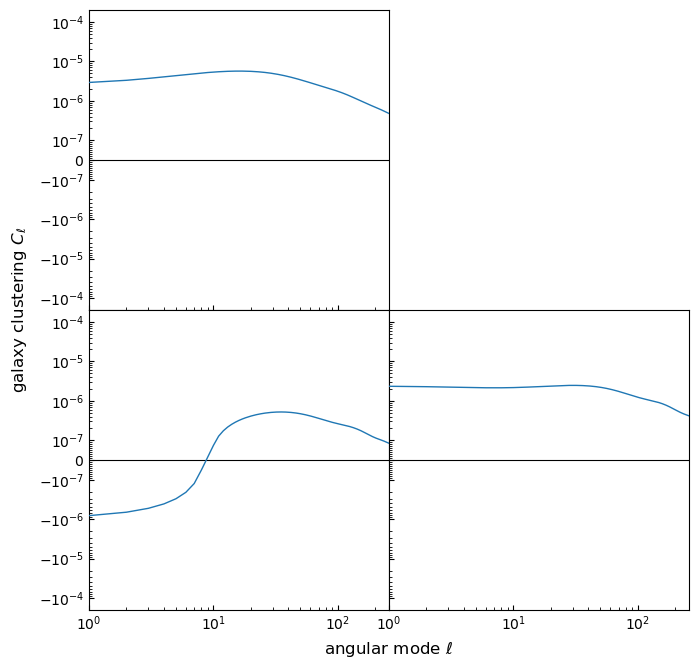

In [18]:
plot_clustering(_theory_cls);

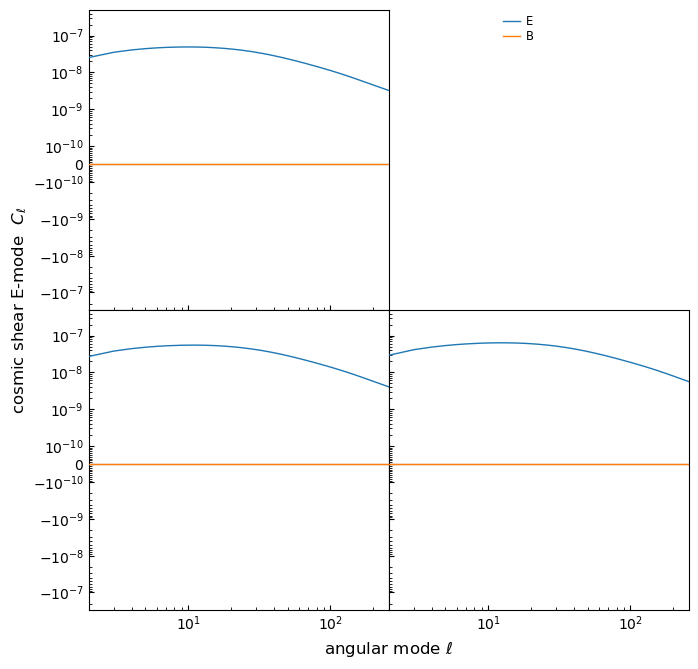

In [19]:
plot_shear(_theory_cls);

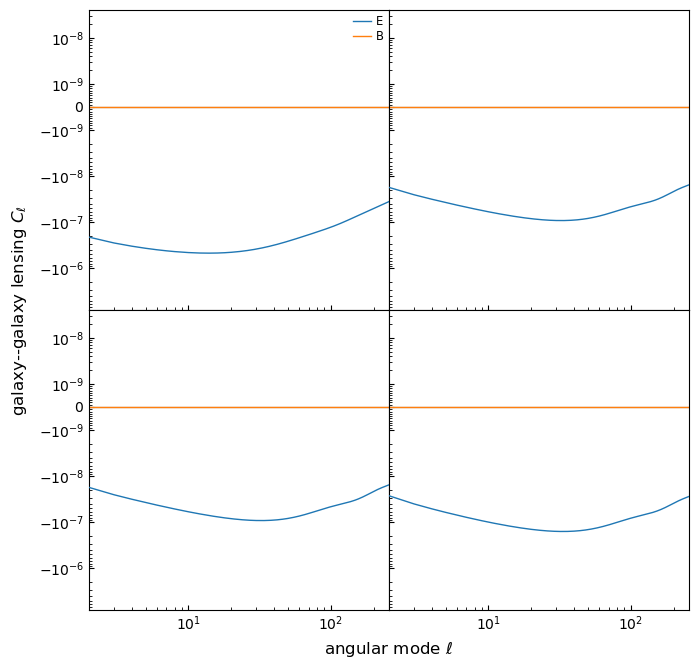

In [20]:
plot_clusteringxshear(_theory_cls);

## Visibility Mask

In [9]:
vmap = hp.read_map('data/vmap.fits')

In [10]:
views = [
    dict(
        rot=(58.0, -46.5),
        lonra=[-22.0, 22.0],
        latra=[-22.0, 22.0],
    ),
]

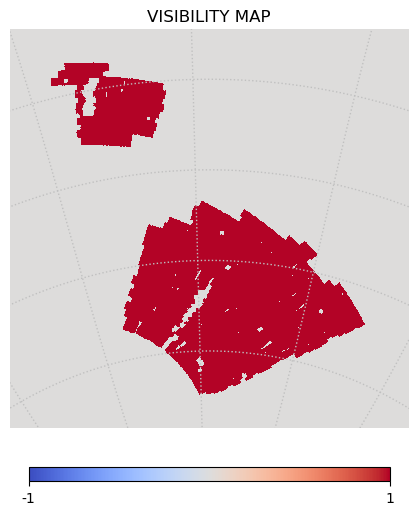

In [11]:
hp.cartview(vmap,
            **views[0],
            title="VISIBILITY MAP",
            cmap="coolwarm",
            min=-1,
            max=1,
            bgcolor="gainsboro")
hp.graticule(5.0, 5.0, c="silver")

## Simulated Maps

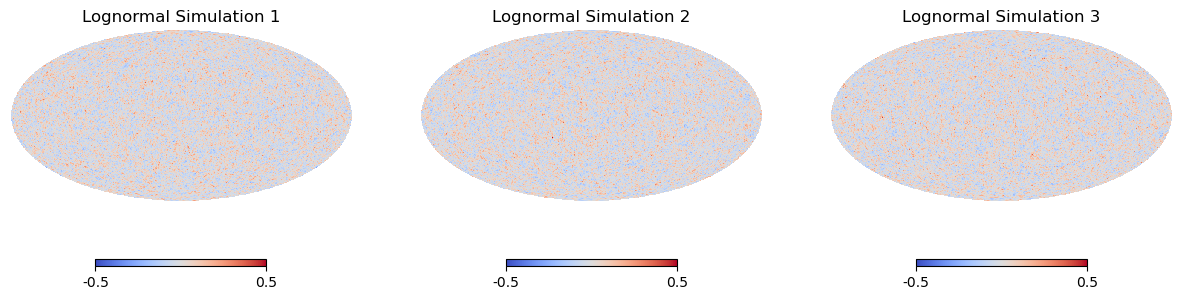

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 15))

plt.axes(ax1)
m = hp.read_map("lognormal_sims/lognormal_sim_1/POS_1.fits")
hp.mollview(m,
    title="Lognormal Simulation 1",
    hold=True,
    cmap="coolwarm",
    min=-0.5,
    max=0.5)

plt.axes(ax2)
m = hp.read_map("lognormal_sims/lognormal_sim_2/POS_1.fits")
hp.mollview(m,
    title="Lognormal Simulation 2",
    hold=True,
    cmap="coolwarm",
    min=-0.5,
    max=0.5)

plt.axes(ax3)
m = hp.read_map("lognormal_sims/lognormal_sim_3/POS_1.fits")
hp.mollview(m,
    title="Lognormal Simulation 3",
    hold=True,
    cmap="coolwarm",
    min=-0.5,
    max=0.5)